In [18]:
#required packeges are imported.
import pandas as pd 
import numpy as np

In [19]:
#data are uploaded.
train = pd.read_csv('C:\\Users\\012476\\Desktop\\train.csv')
test = pd.read_csv('C:\\Users\\012476\\Desktop\\test.csv')
gender_submission= pd.read_csv('C:\\Users\\012476\\Desktop\\gender_submission.csv')

In [20]:
#Data Description:
#PassengerId: Passenger Identification Number unique
#Survived: Survival Status -> 0=NO and 1=YES
#Pclass: Passenger Class -> 1=1st, 2=2nd and 3=3rd
#Name: Name
#Sex : Sex -> Male and Female
#SibSp: Number of Siblings/Spouses Aboard
#Parch: Number of Parents/Children Aboard
#Ticket: Ticker Number
#Fare: Passenger Fare
#Cabin: Cabin
#Embarked: Port of Embarkation -> C = Cherbourg; Q = Queenstown and S = Southampton

In [21]:
# we are investigating train data set 
Data_dict = pd.DataFrame(data=train.dtypes, columns = {'DataType'})

In [22]:
#there are two types of variables in the train date such that  Numerical attributes and Catergorical attributes.

In [23]:
#statistical values of numericical attributes as follows
train.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#frequency,count,and top values of categorical attributes as follows.
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fynney, Mr. Joseph J",male,347082,B96 B98,S
freq,1,577,7,4,644


In [25]:
#Data quality 
#missing values of columns as follows
Data_dict['MissingVal'] = train.isnull().sum()
Data_dict

,DataType,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [26]:
#Notice that Age and Cabin have plenty Missing Values. 

In [27]:
#unique values are contained by each columns
Data_dict['UniqueVal'] = train.nunique()
Data_dict

,DataType,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [28]:
#count of data for each columns 
Data_dict['Count'] = train.count()
 #here are the summary,
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [29]:
#check for duplicate rows
train[train.duplicated()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [30]:
#Thus there is no duplicated rows.

In [31]:
#check for outlier 
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df
remove_outlier(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [32]:
#Cabin variable will be ignored since no information can be provided
train= train.drop(['Cabin'], axis=1)

In [33]:
#For handling missing value for Age, we will put median of age in the Pclass for missing value.
#In order to do that we are defining following function 
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].median())
    else:
        return Age
      #applying the add_age function
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)

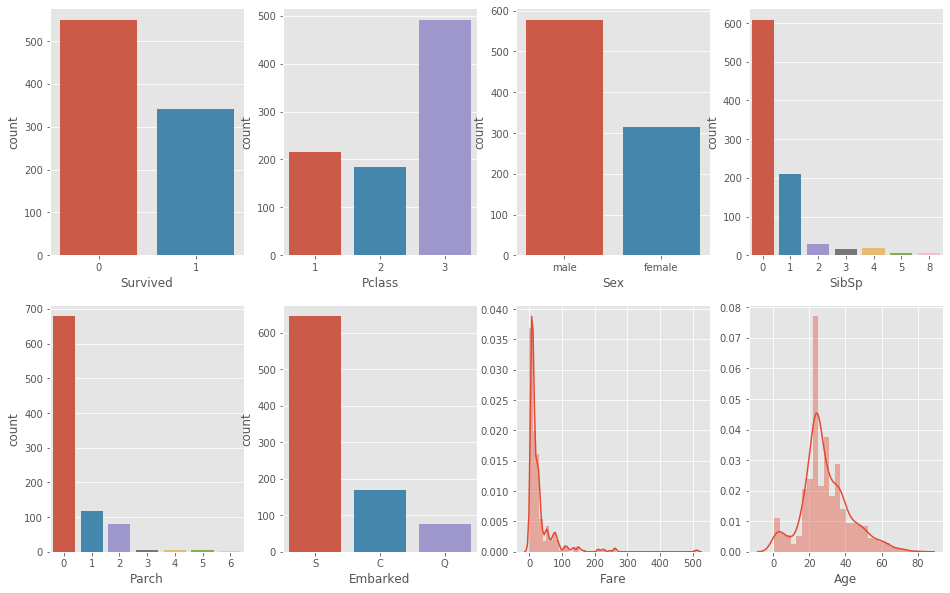

In [34]:
#Univariate Data Analysis for Graphical Representations 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = train, ax = axes[0,0])
sns.countplot('Pclass' , data = train, ax = axes[0,1])
sns.countplot('Sex' , data = train, ax = axes[0,2])
sns.countplot('SibSp' , data = train, ax = axes[0,3])
sns.countplot('Parch' , data = train, ax = axes[1,0])
sns.countplot('Embarked' , data = train, ax = axes[1,1])
sns.distplot(train['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[1,3])

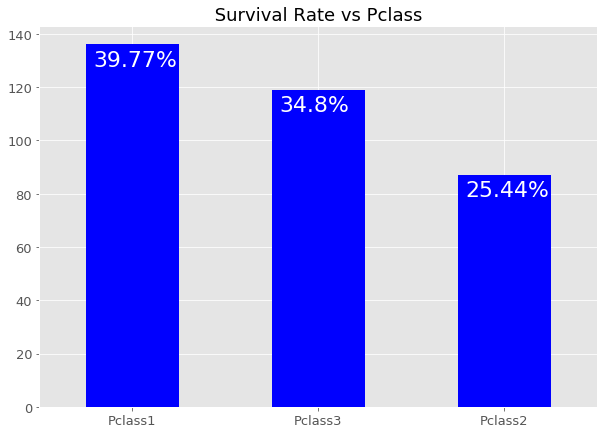

In [36]:
#Bivariate Data Analysis 
#1) Survival Rate vs Pclass 
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Pclass ", fontsize=18)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.04, i.get_height()-8, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


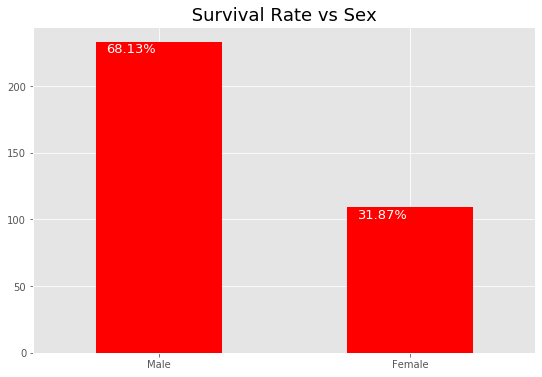

In [37]:
 #2) Survival Rate vs Sex 
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Sex.value_counts().plot(kind='bar', figsize=(9,6),fontsize=10,color = 'red');
plt.xticks(np.arange(2), ['Male' , 'Female'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Sex ", fontsize=18)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.04, i.get_height()-8, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='white')

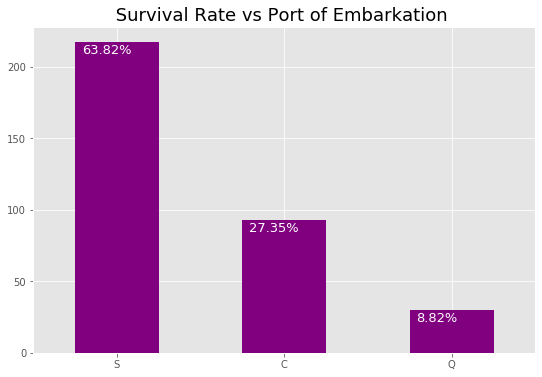

In [39]:
   #3) Survival Rate vs Port of Embarkation 
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Embarked.value_counts().plot(kind='bar', figsize=(9,6),fontsize=10,color = 'purple');
plt.xticks(np.arange(3), ['S' , 'C','Q'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Port of Embarkation  ", fontsize=18)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.04, i.get_height()-8, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='white')


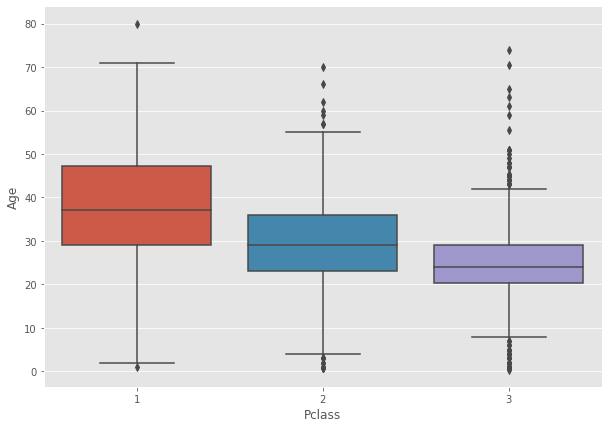

In [40]:
#4) Pclass Vs Age  
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [41]:
#Data Relationships
#let us see correlation between variables via person correlation method.
train.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


In [42]:
#The important outcomes of this table is that survival status has negative correlation between Pclass,
#surviving is  positively correlating to Sex, Age and SibSp  have negatively correlated with survived variable correspondingly. 
#Parch and Fare have positive correlation between Survived correspondingly.

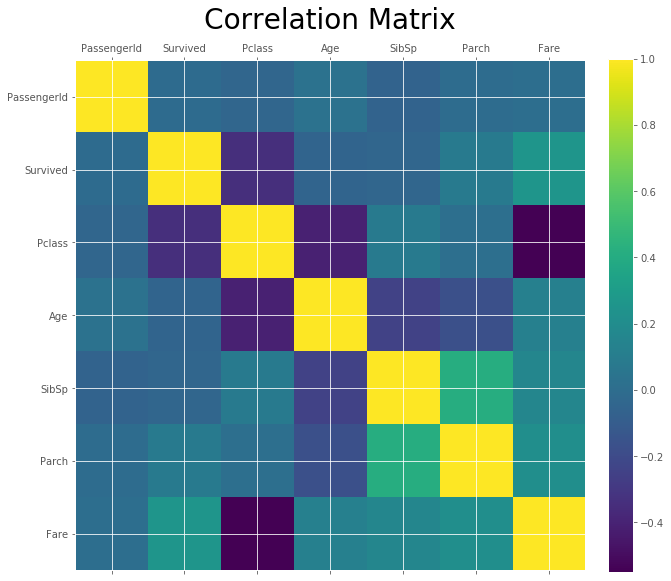

In [43]:
#now let us see correlation maxtrix as visual
     
def plotting_corr( train , size = 10):
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title( 'Correlation Matrix' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(train , size = 10)

In [44]:
#Now we are ready to start building models before  commence, we should drop null rows.  
train.dropna(inplace=True)


In [45]:
#moreover, we will drop  PassengerId, Name,Ticket columns since they dot provide information.
train= train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [46]:
#now, numerating Embarked values such that S-> 1, C->2 and Q->3 in order to use for model
train.loc[train['Embarked']== 'S', 'Embarked'] = 1
train.loc[train['Embarked']== 'C', 'Embarked'] = 2
train.loc[train['Embarked']== 'Q', 'Embarked'] = 3

In [47]:
#now, numerating Embarked values such that Male-> 1 and Female->2 in order to use for model
train.loc[train['Sex']== 'male', 'Sex'] = 1
train.loc[train['Sex']== 'female','Sex'] = 2

In [48]:
#Logitstic regression model will be applied  into train data to predict survival status in test data.
#Target value is Survived. Thus we weill split into data two parts X as  predictor variables  and targer variable as Y
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]

In [49]:
#Applying Logistic Regression to X and Y.
#From sklearn.linear_model  LogisticRegression packege is imported.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

C:\Users\012476\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#Now, we need to predict survived of test data
#For prediction, we should implement data preparation process for train data as before we did for train data. 

In [51]:
#Cabin variable will drop for same reason as we mentioned before.
test= test.drop(['Cabin'], axis=1)

In [52]:
##e will drop  Name,Ticket columns since they dot provide information. PassengerId will be dropped later
test= test.drop([ 'Name', 'Ticket'], axis=1)

In [53]:
#now, numerating Embarked values and Sex variable.
test.loc[test['Embarked']== 'S', 'Embarked'] = 1
test.loc[test['Embarked']== 'C', 'Embarked'] = 2
test.loc[test['Embarked']== 'Q', 'Embarked'] = 3
test.loc[test['Sex']== 'male', 'Sex'] = 1
test.loc[test['Sex']== 'female','Sex'] = 2

In [54]:
#adding median age value of Pclasses in Test data.
def add_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(test[test["Pclass"] == Pclass]["Age"].median())
    else:
        return Age
      #applying the add_age function
test["Age"] = test[["Age", "Pclass"]].apply(add_age_test,axis=1)

In [55]:
#dropping null rows of test
test.dropna(inplace=True)

In [56]:
#Test data left join gender_submission via PassengerId. 
test=pd.merge(test, gender_submission, on='PassengerId', how='left')

In [57]:
#drop PassengerId
test= test.drop([ 'PassengerId'], axis=1)

In [58]:
X_test = test.drop("Survived",axis=1)
Y_real= test["Survived"]

In [59]:
#Prediction of survival status of test value
predictions = logmodel.predict(X_test)

In [60]:
#Chechking the model how it is accurete
#importing classifiation_report packege from sklearn.metrics
from sklearn.metrics import classification_report
print(classification_report(Y_real, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       265
           1       0.90      0.91      0.91       152

    accuracy                           0.93       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



In [61]:
#We get %93 accuraccy rate, It is good

In [62]:
#Let’s see the confusion matrix
#importing confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_real, predictions)

array([[250,  15],
       [ 13, 139]], dtype=int64)

In [63]:
#True positive: 250 Our prediction was a positive result and observed positive 
#True negative: 139 Our prediction was a negative result and observed negative
#False positive: 15 Our prediction was a positive result and observed negative  
#False negative: 13 Our prediction was a negative result and observed positive  